# MODIS-Aqua Satellite Tutorial for Particulate Organic Carbon in the Bay Of Bengal

### Author: **Md Rony Golder**, Research Assistant, Fisheries and Marine Resource Technology Discipline, Khulna University, Khulna

This notebook walks through plotting data from the NASA MODIS-Aqua Satellite. Data can be downloaded here:  https://oceancolor.gsfc.nasa.gov/data/aqua/.

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

### Required Python Modules:

First, the notebook must be set up with all the necessary tools available from the Jupyter Notebook Ecosystem.

| Module name | Description |
| :---: | :---|
| **os** | [operating system interfaces](https://docs.python.org/3.7/library/os.html) (manage paths, create directories...) |
| **numpy** | [NumPy](https://numpy.org/) allows carrying out scientific computing with Python and managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) handles netCDF files in an intuitive and interactive way. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python numerical plotting library |
| **basemap** |[The basemap toolkit](https://matplotlib.org/basemap/) is a library for plotting 2D data on maps. |
| **netCDF4** |[netCDF4](https://unidata.github.io/netcdf4-python/) is a Python interface to the netCDF C library. |

import Libraries 

In [2]:
import netCDF4                        
import xarray as xr         
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
import matplotlib.colors

Point Python to the folder containing your data. Ideally, it's in the same directory as this Jupyter notebook.

In [3]:
parent_dir = os.getcwd()
file_path = os.path.join(parent_dir, 'monthly-data')

output_dir = os.path.join(parent_dir, 'visualizations')
try:
    os.mkdir(output_dir)
except OSError as error:
    print('Folder for visualization output exists.')

files = [item for item in os.listdir(file_path) if not item.startswith('.')]

Folder for visualization output exists.


Make sure we got the right files:

In [6]:
files.sort()
files

['A20021822019212.nc',
 'A20022132019243.L3m_MC_POC_poc_4km.nc',
 'A20022442019273.L3m_MC_POC_poc_4km.nc',
 'A20022742019304.L3m_MC_POC_poc_4km.nc',
 'A20023052018334.L3m_MC_POC_poc_4km.nc',
 'A20023352018365.L3m_MC_POC_poc_4km.nc',
 'A20030012019031.L3m_MC_POC_poc_4km.nc',
 'A20030322019059.L3m_MC_POC_poc_4km.nc',
 'A20030602019090.L3m_MC_POC_poc_4km.nc',
 'A20030912019120.L3m_MC_POC_poc_4km.nc',
 'A20031212019151.L3m_MC_POC_poc_4km.nc',
 'A20031522019181.L3m_MC_POC_poc_4km.nc']

Open these files with xarray:

In [7]:
datasets = [xr.open_dataset('./monthly-data/' + file) for file in files]

In order to make some plots, we need to find the name of the variable we're interested in. xarray has a handy .data_vars method that prints out all of the variables available to you. You can also use .attrs to get some metadata information. For now, let's look for the name of our poc variable.

In [8]:
datasets[0].data_vars

Data variables:
    poc      (lat, lon) float32 ...

In the code cell below, we store the content of the latitude,longitude variables in Lat, Lon, following the example of above cell

In [9]:
Lon=datasets[0].lon.values 
Lat=datasets[0].lat.values

##### Plot the data with 1 figure per date

The main functions used in the following cell to generate a plot are:
- `plt.figure()`: creates a new figure of dimensions `figsize(width,height)` in inches
- `Basemap()`creates a map background and allows to define all the properties (such as projection, plotting window, coastlines, etc.)
- `meshgrid()`: creates two grids of dimensions (Lon, Lat). It dupplicates the Lon vector along the Lat vector and stores it in LonG and dupplicates the Lat vector along the Lon vector and stores it in LatG.
- `Map()`: converts Lat/Lon projection to X/Y axis.
- `pcolormesh()`: creates a pseudocolor plot with a rectangular grid.
- `astype()`: allows to change the `datetime64` object datatype

findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.


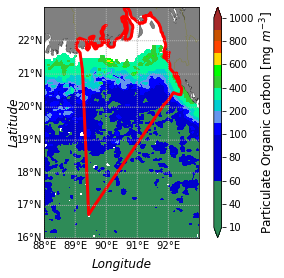

In [10]:
LatMin = 16
LatMax = 23
LonMin = 88
LonMax = 93
Map = Basemap(projection='merc',
              llcrnrlon=LonMin, llcrnrlat=LatMin,
              urcrnrlon=LonMax, urcrnrlat=LatMax,
              resolution='i')

# Draw coastlines, country boundaries, fill continents.
Map.drawcoastlines(linewidth=0.25)
Map.drawcountries(linewidth=0.25, color='olive')
Map.fillcontinents(color='gray')

# Draw parallels & meridians
parallels = np.arange(16,23,1)
Map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, color='0.7')
meridians = np.arange(88,93,1)
Map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, color='0.7')
Map.readshapefile('BD_boundary/BD_new_martime_boundary', 'Watersheds', color = 'red', linewidth=3)

# Generate Lat/Lon grid
LonG, LatG = np.meshgrid(Lon, Lat)

# Projection from Lat/Lon to axis X/Y
xrange=range
X, Y = Map(LonG, LatG)

import matplotlib.colors
#colors = ["#eaa941", "#efef39", "#53a447","#084668","#08859B","#08ACAC","#08FFFF","#08E7B2","#08C173","#088F4F","#2F9708","#65CE08","#DFE508","#E0A608","#DF4608","#B60808","#701313","#86403F","#9E706F","#B69F9F","#800000"]
colors=["#2E8B57", "#0000CD","#0000FF","#6495ED","#00CED1","#00FFFF","#00FA9A","#00FF7F","#32CD32","#00FF00","#FFFF00","#FFD700","#FF8C00", "#FF4500","#FF0000","#C85200", "#B22222","#A52A2A"]
cmap= matplotlib.colors.ListedColormap(colors)
norm= matplotlib.colors.Normalize(vmin=10,vmax=1000)
##########
plt.rcParams["font.family"] = "Times New Roman"
P = Map.contourf(X, Y, datasets[0].poc, cmap=cmap, extend='both', norm=norm,levels=[10,20,40,50,60,70,80,90,100,150,200,300,400,500,600,700,800,900,1000])#,vmin=0, vmax=850)
Cb = Map.colorbar(P, "right", pad=0.2)
Cb.ax.set_ylabel('Particulate Organic carbon [mg $m^{-3}$]', fontsize = 12,family='times new roman')  #For the name of Colorbar

plt.ylabel('Latitude', labelpad=24, style= 'italic', fontsize=12, family='times new roman')
plt.xlabel('Longitude', labelpad=20,style= 'italic', fontsize=12,family='times new roman')
#plt.title(datasets[0].attrs['time_coverage_start'][5:7], fontsize=16)
plt.tight_layout()
# plt.savefig('./visualizations/Bay of bengal.png')

Now let's plot the monthly climatology at this location and see how poc levels change on a monthly basis

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


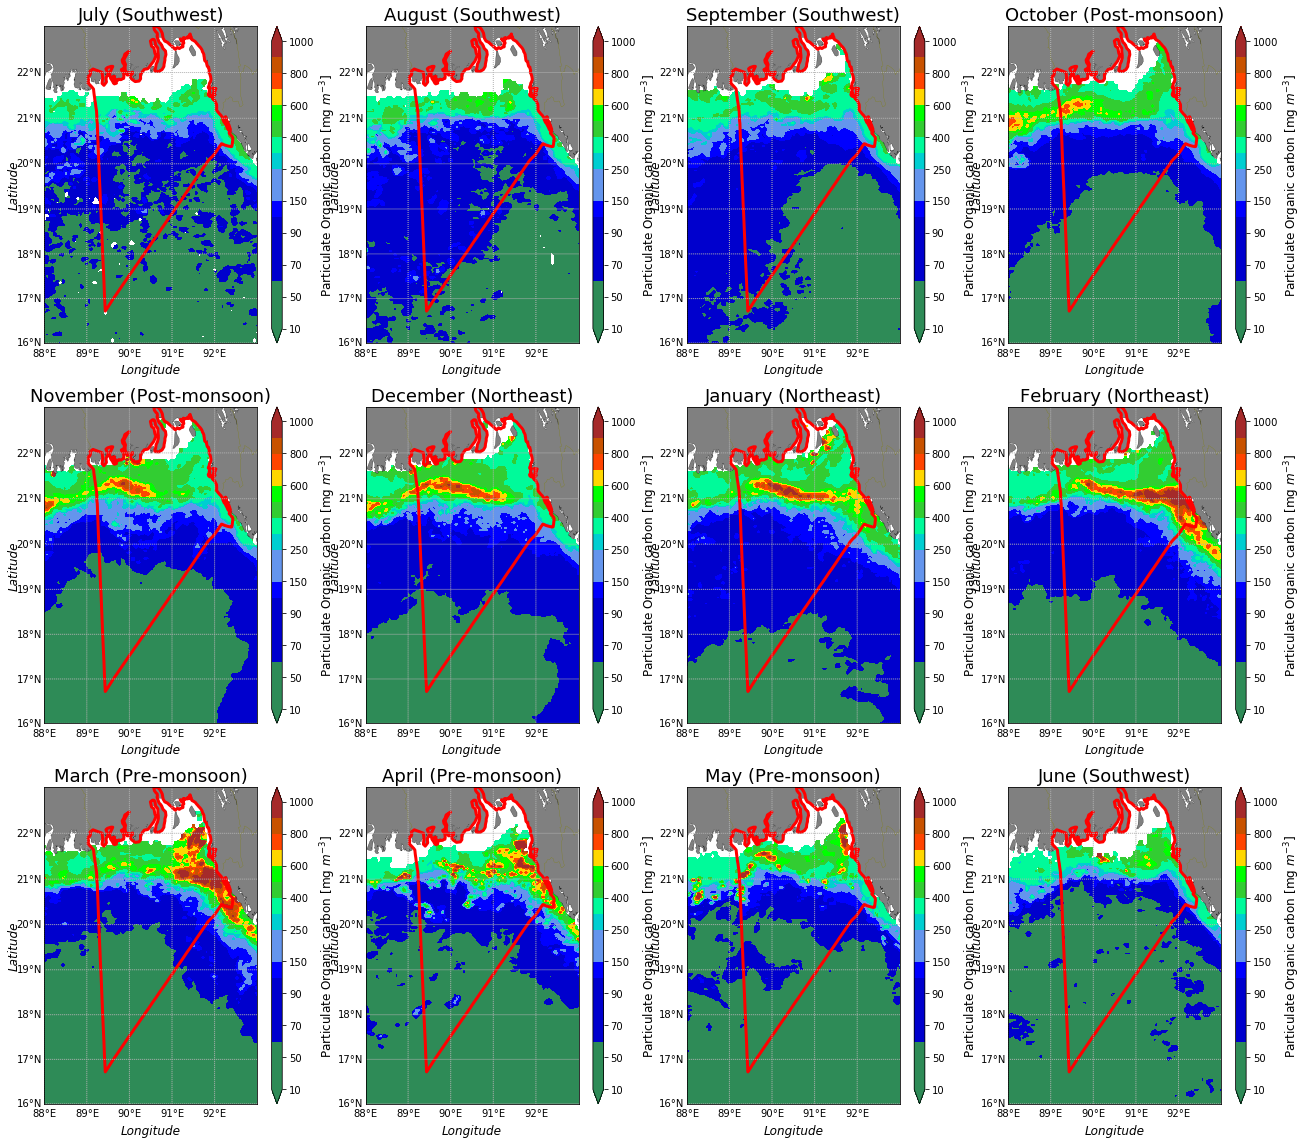

In [11]:
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10,ax11, ax12)) = plt.subplots(3, 4, figsize=(18,16))
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10,ax11, ax12]
majors = ['July (Southwest)', 'August (Southwest)','September (Southwest)', 
          'October (Post-monsoon)','November (Post-monsoon)', 'December (Northeast)',
          'January (Northeast)', 'February (Northeast)', 'March (Pre-monsoon)','April (Pre-monsoon)', 'May (Pre-monsoon)', 'June (Southwest)',]

# Loop through the subplot axes
for i in range(len(ax_list)):
    
    # Select dataset to plot
    ds = datasets[i]
    
    # Select axes to plot onto
    axe=ax_list[i]
    coloum=majors[i]
    Map = Basemap(projection='merc',ax=axe,
                  llcrnrlon=LonMin, llcrnrlat=LatMin,
                  urcrnrlon=LonMax, urcrnrlat=LatMax,
                  resolution='i')

    # Draw coastlines, country boundaries, fill continents.
    Map.drawcoastlines(linewidth=0.25)
    Map.drawcountries(linewidth=0.25, color='olive')
    Map.fillcontinents(color='gray')

    # Draw parallels & meridians
    parallels = np.arange(16,23,1)
    Map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, color='0.7')
    meridians = np.arange(88,93,1)
    Map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=10, color='0.7')
    Map.readshapefile('BD_boundary/BD_new_martime_boundary', 'Watersheds', color = 'red', linewidth=3)

    # Generate Lat/Lon grid
    LonG, LatG = np.meshgrid(Lon, Lat)

    # Projection from Lat/Lon to axis X/Y 
    X, Y = Map(LonG, LatG)
#     cmap = [(0.0,0.0,0.0)] + [(cm.jet(i)) for i in range(1,256)] 
#     cmap = mpl.colors.ListedColormap(cmap)
    
#     P = axe.pcolormesh(X, Y, ds.poc, cmap=cmap, vmin=10, vmax=800)
#     Cb = Map.colorbar(P, "right", )
#     colors = ["#eaa941", "#efef39", "#53a447","#084668","#08859B","#08ACAC","#08FFFF","#08E7B2","#08C173","#088F4F","#2F9708","#65CE08",
#     "#DFE508","#E0A608","#DF4608","#B60808","#701313","#86403F","#9E706F","#B69F9F"]
    colors=["#2E8B57", "#0000CD","#0000FF","#6495ED","#00CED1","#00FFFF","#00FA9A","#00FF7F","#32CD32","#00FF00","#FFFF00","#FFD700","#FF8C00", "#FF4500","#FF0000","#C85200", "#B22222","#A52A2A"]
    cmap= matplotlib.colors.ListedColormap(colors)
    norm= matplotlib.colors.Normalize(vmin=10,vmax=1000)
    P = axe.contourf(X, Y, ds.poc,extend='both', cmap=cmap, norm=norm,levels=[10,40,50,60,70,80,90,100,150,200,250,300,400,500,600,700,800,900,1000])
    #Cb = Map.colorbar(P, "right", )
    Cb = Map.colorbar(P, "right", pad=0.2)
    Cb.ax.set_ylabel('Particulate Organic carbon [mg $m^{-3}$]', fontsize = 12)
    # Generate plot and title
    #ds_slice.chlor_a.plot.contourf(x='lon', y='lat', ax=ax_list[i], vmin=vmin, vmax=vmax, cmap=cmocean.cm.algae)
    #axe.set_title(ds.attrs['time_coverage_start'][:4], fontsize=16)
    axe.set_xlabel('Longitude', labelpad=20,style= 'italic', fontsize=12,family='times new roman')
    axe.set_ylabel('Latitude', labelpad=24, style= 'italic', fontsize=12, family='times new roman')
    # Generate plot and title
    #ds_slice.chlor_a.plot.contourf(x='lon', y='lat', ax=ax_list[i], vmin=vmin, vmax=vmax, cmap=cmocean.cm.algae)
    #axe.set_title(ds.attrs['time_coverage_start'][5:7], fontsize=16)
    axe.set_title(coloum, fontsize=18, loc='center')
plt.rcParams["font.family"] = "Times New Roman"    
plt.tight_layout()
plt.savefig('visualizations/Monthly_png_dpi_300.png', dpi=300)

Thanks for viewing!